Sima, C., Renz, K., Chitta, K., Chen, L., Zhang, H., Xie, C., ... & Li, H. (2023). [DriveLM: Driving with graph visual question answering](https://arxiv.org/abs/2312.14150). arXiv preprint arXiv:2312.14150.

**Abstract**  
<!-- We study how vision-language models (VLMs) trained on web-scale data can be integrated into end-to-end driving systems to boost generalization and enable interactivity with human users. While recent approaches adapt VLMs to driving via single-round visual question answering (VQA), human drivers reason about decisions in multiple steps. Starting from the localization of key objects, humans estimate object interactions before taking actions. The key insight is that with our proposed task, Graph VQA, where we model graph-structured reasoning through perception, prediction and planning question-answer pairs, we obtain a suitable proxy task to mimic the human reasoning process. We instantiate datasets (DriveLM-Data) built upon nuScenes and CARLA, and propose a VLM-based baseline approach (DriveLM-Agent) for jointly performing Graph VQA and end-to-end driving. The experiments demonstrate that Graph VQA provides a simple, principled framework for reasoning about a driving scene, and DriveLM-Data provides a challenging benchmark for this task. Our DriveLM-Agent baseline performs end-to-end autonomous driving competitively in comparison to state-of-the-art driving-specific architectures. Notably, its benefits are pronounced when it is evaluated zero-shot on unseen objects or sensor configurations. We hope this work can be the starting point to shed new light on how to apply VLMs for autonomous driving. To facilitate future research, all code, data, and models are available to the public. -->
我们研究如何将基于网络规模数据训练的视觉语言模型(VLM)集成到端到端驾驶系统中, 以提高泛化能力并实现与人类用户的交互。
虽然最近的方法通过单轮视觉问答 (VQA), 使 VLM 适用于驾驶，但人类驾驶员通过多个步骤进行推理决策。
从关键物体的定位开始, 人类在采取行动之前估计物体的交互。
关键的见解是, 通过我们提出的任务--Graph VQA, 在该任务中通过感知、预测和规划问答对, 建模图结构推理, 我们获得了一个合适的智能体任务来模仿人类推理过程。
我们基于 nuScenes 和 CARLA 实例化数据集 (DriveLM-Data), 并提出了一种基于 VLM 的基线方法 (DriveLM-Agent), 用于联合执行Graph VQA 和端到端驱动。
实验表明, Graph VQA 提供了一个简单、合乎正道的框架来推理驾驶场景, DriveLM-Data 为此任务提供了一个具有挑战性的基准。
与最先进的驾驶专用架构相比, 我们的 DriveLM-Agent 基线能够以极具竞争力的方式执行端到端自动驾驶。
值得注意的是, 当它在未见过的物体或传感器配置上进行零样本评估时, 它的好处是显而易见的。
我们希望这项工作能够成为一个起点, 为如何将 VLMs 应用到自动驾驶中提供新的思路。
为了方便未来研究, 所有代码、数据和模型都向公众开放。

# Introduction

<!-- Current Autonomous Driving (AD) stacks are still lacking crucial capabilities [8, 11]. One key requirement is generalization, which involves the ability to handle unseen scenarios or unfamiliar objects. A secondary requirement pertains to the interaction of these models with humans, highlighted for example by EU regulations that mandate explainability in deployment [3]. Furthermore, unlike today's AD models, humans do not navigate based on geometrically precise bird's-eye view (BEV) representations [13, 26, 39]. Instead, humans implicitly perform object-centric perception, prediction, and planning (which we refer to as $P_{1−3}$): a rough identification and localization of key objects, followed by reasoning about their possible movement and aggregation of this information into a driving action [49, 62]. -->
当前的自动驾驶 (AD) 栈仍然缺乏关键功能 [8, 11]。
一项关键需求是泛化, 这涉及处理未见过的场景或不熟悉的对象的能力。
第二个需求涉及这些模型与人类的交互, 例如欧盟法规强调部署的可解释性[3]。
此外, 与当今的 AD 模型不同, 人类不会(基于几何精确的鸟瞰图 (BEV) 表示)导航 [13, 26, 39]。
相反，人类隐式地执行以对象为中心的感知、预测和规划(我们称之为 $P_{1−3}$): 关键对象的粗略识别和定位, 然后推理它们可能的运动, 并将这些信息聚合为驾驶动作[49, 62]。

<!-- Simultaneously, another field has been forging ahead: Vision-Language Models (VLMs) [40, 45, 73, 83]. These models have several strengths. First, they hold a base understanding of the world from internet-scale data that could potentially facilitate generalization for planning in AD. In fact, this sort of generalization has already been achieved by VLMs for simpler robotics tasks [18, 85]. Second, the use of language representations as an input and output offers a platform for human-friendly interaction with these models, unlike bounding boxes or trajectories that are more common to current methods [14, 25, 41, 58]. Finally, VLMs are able to make decisions in multiple steps linked by logical reasoning [4, 16, 75, 77, 82, 85]. Importantly, even though they reason in multiple separate steps, VLMs are end-to-end differentiable architectures, a characteristic that is highly desirable for autonomous driving [8]. -->
与此同时, 另一个领域也在不断发展: 视觉语言模型(VLMs)[40, 45, 73, 83]。
这些模型有一些优点。
首先, 他们通过互联网规模的数据对世界有了基本的了解, 这些数据可能促进自动驾驶规划的泛化。
事实上, 对于更简单的机器人任务, VLMs 已经实现了这种泛化 [18, 85]。
其次, 使用语言表示作为输入和输出(为与这些模型进行人性化交互)提供了一个平台, 这与当前方法中更常见的边界框或轨迹不同[14, 25, 41, 58]。
最后, VLMs 能够在(通过逻辑推理链接起来的)多个步骤中做出决策 [4, 16, 75, 77, 82, 85]。
重要的是, 即使它们在多个独立的步骤中进行推理, VLMs 是端到端可微架构, 这是自动驾驶非常需要的特性 [8]。

<!-- Recent work towards enabling the application of VLMs to AD systems falls into two categories: scene-level or single object-level Visual Question Answering (VQA). Scene-level VQA refers to the task of describing the driving behavior by one or two supporting reasons, e.g., “The car is moving into the right lane because it is safe to do so.” [34, 35]. Single object-level VQA formulates the understanding of the ego vehicle's response to a single object by a chain of QAs in the form of “what-which-where-how-why”, e.g., “The ego vehicle stops because there is a pedestrian in a white shirt crossing the intersection in front of the ego vehicle and it does not want to crash into the pedestrian.” [47, 55, 59]. Unfortunately, neither of these paradigms provides a suitable proxy task to mimic the $P_{1−3}$ reasoning process in humans, who consider multiple objects and reason about each in multiple steps. Therefore, in this paper, we propose a new task, along with corresponding datasets and a baseline model architecture (Fig. 1). -->
最近(致力于将 VLMs 应用到自动驾驶系统的)工作分为两类: 场景级或单个对象级视觉问答 (VQA)。
场景级 VQA 是指(通过一两个支持原因)描述驾驶行为的任务, 例如, "汽车正在驶入右侧车道, 因为这样做是安全的" [34, 35]。
单个对象级 VQA(通过一系列 QAs 以"what-which-where-how-why"的形式)建立了(自车对单个对象的响应的)理解,
例如, "自车停下来, 因为有一个穿着白衬衫的行人在自车前穿过十字路口, 并且不想撞到行人" [47、55、59]。
不幸的是, 这些范例都没有提供合适的智能体任务, 以模拟人类的 $P_{1−3}$ 推理过程, 人类考虑多个对象, 并在多个步骤中对每个对象进行推理。
因此, 在本文中, 我们提出了一项新任务, 以及相应的数据集和基线模型架构([图1](#fig.1))。

<span id='fig.1'></span>
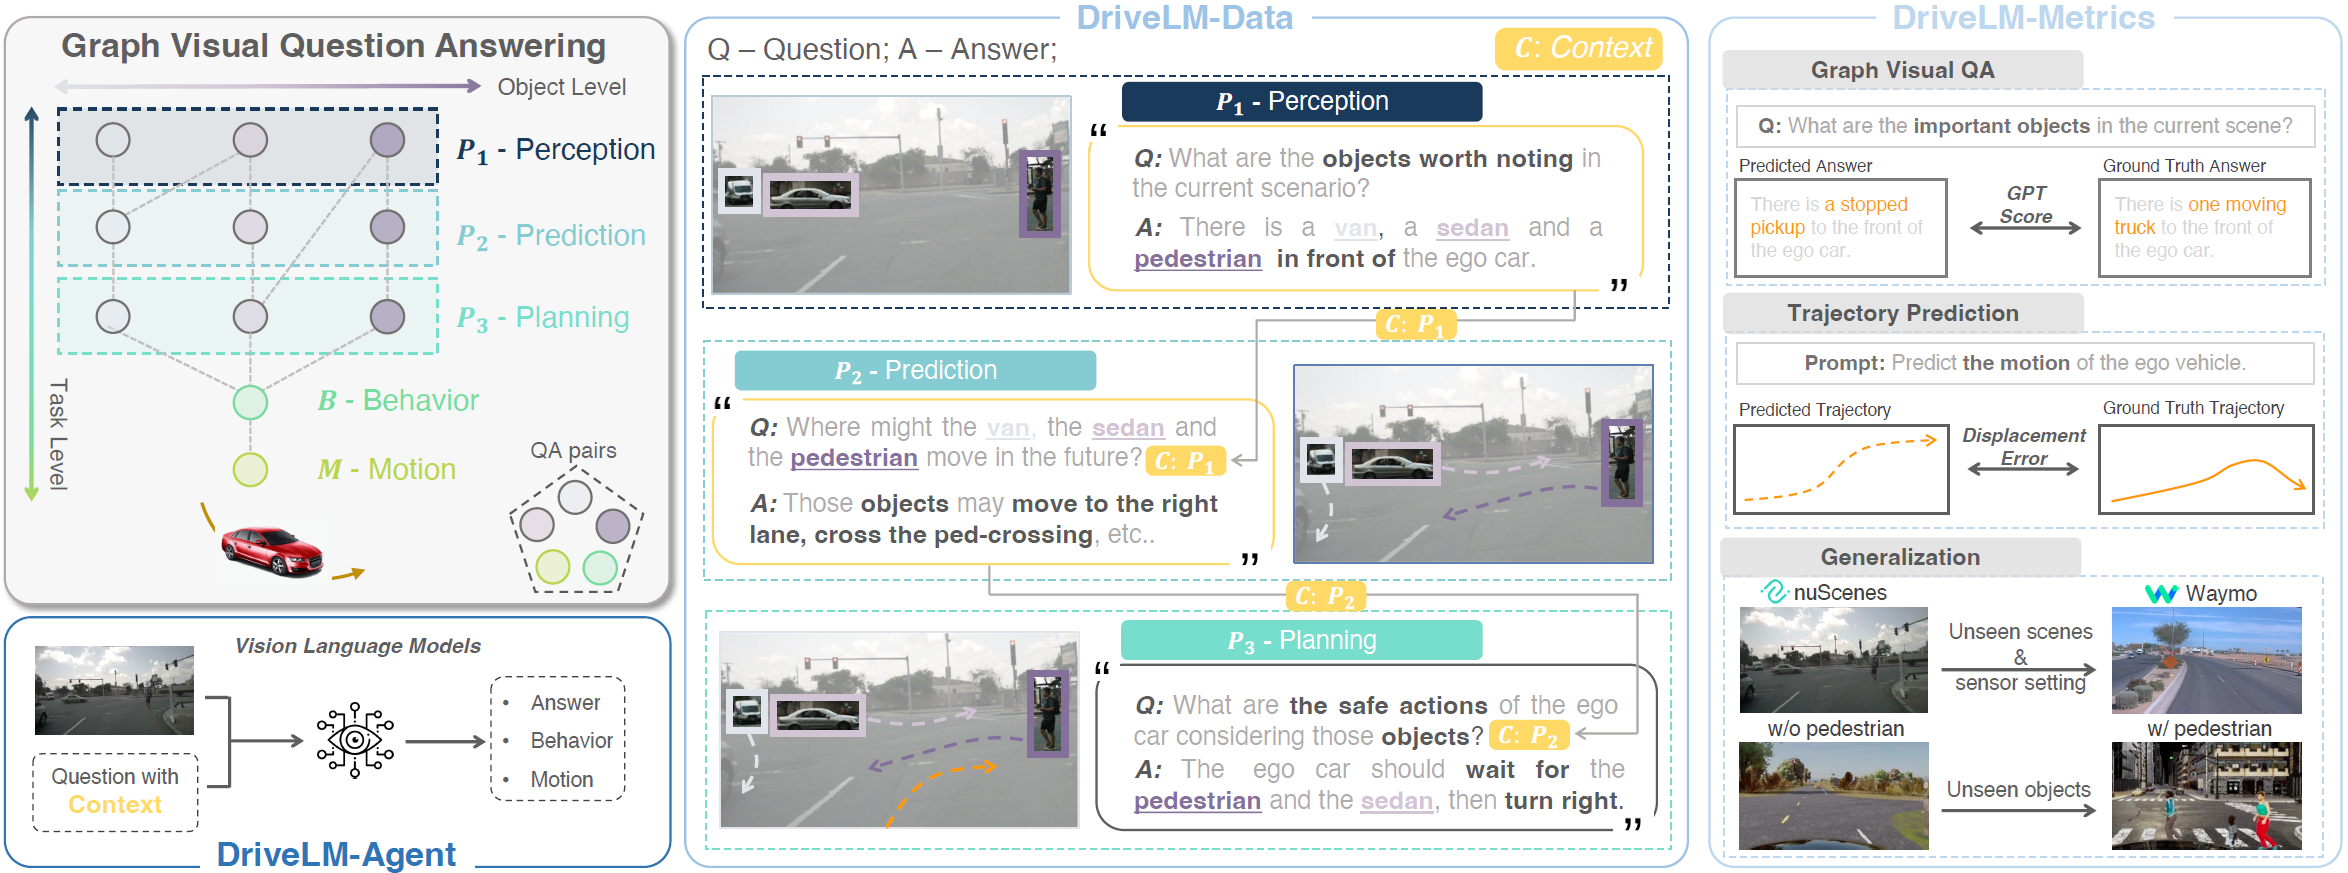
<!-- Figure 1. We present DriveLM: A new task, dataset, metrics, and baseline for end-to-end autonomous driving. Inspired by [8], DriveLM considers Graph Visual Question Answering (GVQA), where question-answer pairs are interconnected via logical dependencies at the object-level, i.e., interactions between object pairs, and the task-level, e.g., perception → prediction → planning → behavior (discretized action described in natural language) → motion (continuous trajectory). We propose DriveLM-Data for training DriveLM-Agent, a baseline for GVQA. We validate its effectiveness using the DriveLM-Metrics on challenging settings requiring zero-shot generalization. -->
图1. 我们提出了 DriveLM: 端到端自动驾驶的新任务、数据集、指标和基线。
受[8]启发, DriveLM 考虑 Graph Visual Question Answering(GVQA), 其中问答对通过对象级(即对象对之间的交互)和任务级(例如, 感知$\to$预测$\to$规划$\to$行为(用自然语言描述的离散动作)$\to$运动(连续轨迹))的逻辑依赖关系互连。
我们提出了 DriveLM-Data, 用于训练 DriveLM-Agent, 一个 GVQA 的基线。
我们使用 DriveLM-Metrics (在需要零样本泛化的挑战性配置上)验证其有效性。

<!-- **Task. Graph Visual Question Answering (GVQA)** involves formulating $P_{1−3}$ reasoning as a series of question-answer pairs (QAs) in a directed graph. Its key difference to the aforementioned VQA tasks for AD is the availability of logical dependencies between QAs which can be used to guide the answering process. GVQA also encompasses questions regarding behavior and motion planning, with dedicated metrics (details in Section [2](#DriveLM:-Task,-Data,-Metrics)). -->
**任务. Graph Visual Question Answering (GVQA)** 涉及将 $P_{1−3}$ 推理表述为有向图中的一系列问答对 (QAs)。
它与前面提到的自动驾驶 VQA 任务的主要区别在于 QAs 之间逻辑依赖关系的可用性, 可用于指导回答过程。
GVQA 还包含有关行为和运动规划的问题, 以及专用指标(详细信息请参见第 [2](#DriveLM:-Task,-Data,-Metrics) 节)。

<!-- **Datasets. DriveLM-nuScenes** and **DriveLM-CARLA** consist of annotated QAs, arranged in a graph, linking images with driving behavior through logical reasoning. In comparison to existing benchmarks, they provide significantly more text annotations per frame (Fig. 2 and Table 1). We pair these training datasets with challenging test data for evaluating zero-shot generalization. -->
**数据集. DriveLM-nuScenes** 和 **DriveLM-CARLA** 由带标注的 QAs 组成, 这些 QAs 以图的形式排列, 通过逻辑推理将图像与驾驶行为关联起来。
与现有基准相比, 它们每帧提供更多的文本注释(图 2 和表 1)。
我们将这些训练数据集与具有挑战性的测试数据进行配对, 以评估零样本泛化。

<!-- **Model. DriveLM-Agent** employs a trajectory tokenizer that can be applied to any general VLM [40, 45, 53, 83], coupled with a graph prompting scheme that models logical dependencies as context inputs for VLMs. The result is a simple, elegant methodology to effectively repurpose VLMs for end-to-end AD (Section 3). -->
**模型. DriveLM-Agent** 采用可应用于任何通用 VLM [40, 45, 53, 83] 的轨迹词元分析器, 并结合图形提示方案, 该方案将逻辑依赖性建模为 VLMs 的上下文输入。
结果是一种简单、优雅的方法, 可以有效地将 VLMs 重新用于端到端自动驾驶(第 [3](#DriveLM-Agent:-A-GVQA-Baseline) 节)。

<!-- Our experiments provide encouraging results. We find that GVQA on DriveLM is a challenging task, where current methods obtain moderate scores and better modeling of logical dependencies is likely necessary to achieve strong QA performance. Even so, DriveLM-Agent already performs competitively to state-of-the-art driving-specific models [26] when tested in the open-loop planning setting, despite its task-agnostic and generalist architecture. Furthermore, employing a graph structure improves zero-shot generalization, enabling DriveLM-Agent to correctly handle novel objects unseen during training or deployment on the Waymo dataset [63] after training only on nuScenes [5] data. From these results, we believe that improving GVQA holds great potential towards building autonomous driving agents with strong generalization. -->
我们的实验提供了令人鼓舞的结果。
我们发现 DriveLM 上的 GVQA 是一项具有挑战性的任务, 在该任务中当前方法获得中等分数, 并且可能需要更好的逻辑依赖关系建模才能实现强大的 QA 性能。
即便如此, 尽管 DriveLM-Agent 具有与任务无关的通用架构, 但在开环规划配置中进行测试时, 其性能已经可以与最先进的驾驶专用模型 [26] 相媲美。
此外, 采用图结构可以提高零样本泛化能力, 仅在 nuScenes [5] 数据上进行训练后, 使 DriveLM-Agent 能够正确处理(在 Waymo 数据集 [63] 上训练或部署期间)未见过的新物体。
从这些结果来看, 我们相信改进 GVQA (对于构建强泛化性的自动驾驶智能体来说)具有巨大的潜力。

# DriveLM: Task, Data, Metrics
<!-- Human drivers usually decompose their decision-making process into distinct stages that follow a logical progression which encompasses the identification and localization of key objects, their possible future action and interaction, and ego planning based on all this information [22, 46]. This inspires us to propose the GVQA as the critical ingredient of DriveLM, which serves as a suitable proxy task to mimic the human reasoning process. Within this section, we illustrate the formulation of the GVQA task (Section 2.1), introduce DriveLM-Data (Section 2.2) to exemplify the instantiation of GVQA using prominent driving datasets, and overview the DriveLM-Metrics used for evaluation (Section 2.3). -->
人类驾驶员通常将他们的决策过程分解为遵循逻辑进展的不同阶段, 其中包括关键对象的识别和定位、他们未来可能的行动和交互，以及基于所有这些信息的自车规划 [22, 46]。
这启发我们提出 GVQA 作为 DriveLM 的关键组成部分, 它可以作为合适的智能体任务, 以模仿人类推理过程。
在本节中, 我们将阐述 GVQA 任务的构建(第 [2.1](#DriveLM-Task:-GVQA) 节), 介绍 DriveLM-Data(第 [2.2](#DriveLM-Data) 节), 使用著名的驾驶数据集, 举例说明 GVQA 的实例化, 并概述用于评估的 DriveLM-Metrics(第 [2.3](#DriveLM-Metrics) 节)。

## DriveLM-Task: GVQA
<!-- We organize all the Question Answer pairs (QAs) for an image frame into a graph structure, denoted by $G=(V,E)$. $V$ stands for the set of vertices, where each vertex represents a QA pair $v=(q, a)$ associated with one or more key objects in the scenario. The key difference between GVQA and ordinary VQA is that the QAs in GVQA have logical dependencies, which we formulate as the edges between the vertices. $E \subseteq V \times V$, is a set of directed edges, where each edge $e=(v_p, v_c)$ connects the parent QA and the child QA. We formulate the edge set $E$ by incorporating two dimensions: object-level and task-level edges. At the object level, we construct the logical edges $e \in E$ to represent the impact of interactions between different objects. For example, the planning QA node for the sedan is influenced by the perception QA node of the pedestrian in the illustration from Fig. 1 (center). At the task-level, we establish the logical edges $e \in E$ to capture the logical chain of different reasoning stages:
- Perception ($P_1$): identification, description, and localization of key objects in the current scene.
- Prediction ($P_2$): estimation of possible action/interaction of key objects based on perception results.
- Planning ($P_3$): possible safe actions of the ego vehicle.
- Behavior ($B$): classification of driving decision.
- Motion ($M$): waypoints of ego vehicle future trajectory. -->
我们将一个图像帧的所有问答对(QAs)组织成一个图结构, 用 $G=(V,E)$ 表示。
$V$ 表示一组顶点, 其中每个顶点表示(与场景中的一个或多个关键对象关联的)一个 QA 对 $v=(q, a)$。
GVQA 和普通 VQA 之间的关键区别在于 GVQA 中的 QAs 具有逻辑依赖关系, 我们将这种逻辑依赖关系表示为顶点之间的边。
$E \subseteq V \times V$ 是一组有向边, 其中每条边 $e=(v_p, v_c)$ 连接父 QA 和子 QA。
我们通过包含两个维度(对象级和任务级)的边, 构建边集合$E$。
在对象级, 我们构造逻辑边 $e \in E$ 表示不同对象之间交互的影响。
例如, 轿车的规划 QA 顶点受[图1(中)](#fig.1)中的行人的感知 QA 顶点的影响。
在任务层, 我们建立逻辑边$e \in E$, 以捕捉不同推理阶段的逻辑链:
- 感知($P_1$): 当前场景中关键对象的识别、描述和定位。
- 预测($P_2$): 根据感知结果, 估计关键对象可能的动作/交互。
- 规划($P_3$): 自车可能的安全行动。
- 行为($B$): 驾驶决策的分类。
- 运动($M$): 自车未来轨迹的途径点。

<!-- The concepts of perception, prediction, and planning ($P_{1−3}$) are similar to those in end-to-end AD [8], while the concepts of motion and behavior are based on the ego vehicle future trajectory. Specifically, we define the motion M as the ego vehicle future trajectory, which is a set of N points with coordinates $(x, y)$ in bird's-eye view (BEV), denoted as $M = \left\{ (x_0, y_0), (x_1, y_1), \dots, (x_N, y_N) \right\}$. Each point is the offset between the future position and the current position by a fixed time interval. Then, the distance for $x, y$ at each time interval is computed as: -->
感知、预测和规划($P_{1−3}$)的概念与端到端自动驾驶 [8] 中的概念类似, 而运动和行为的概念则基于自车未来轨迹。
具体来说, 我们将运动$M$定义为自车未来轨迹, 它是鸟瞰图(BEV)中$N$个坐标点 $(x, y)$组成的集合, 记为 $M = \left\{ (x_0, y_0), (x_1, y_1), \dots, (x_N, y_N) \right\}$。
每个点都是以固定时间间隔, 未来位置与当前位置之间的偏移量。
然后, 在每个时间间隔 $x, y$ 的距离计算如下:
$$\left\{ x, y \right\}_\text{dist} = \left\{ (\delta_{x,1}, \delta_{y,1}), \dots, (\delta_{x,N}, \delta_{y,N}) \right\}, \tag{1}$$
<!-- where $\delta_{x,i} = x_i − x_{i−1}$ and $\delta_{y,i} = y_i − y_{i−1}$, for $i = 1, 2, \dots, N$. The goal of the behavior representation is to serve as an interface from $P_{1−3}$ to $M$. To obtain a behavior representation, we map the mean of $x_\text{dist}$ and $y_{dist}$ to one of the predefined bins, where each bin corresponds to a category in either speed or steering. These are denoted as $B_{sp}$ and $B_{st}$ respectively. In this work, we consider 5 bins: -->
其中 $\delta_{x,i} = x_i − x_{i−1}$ 和 $\delta_{y,i} = y_i − y_{i−1}$, 对于 $i = 1, 2, \dots, N$。
行为表示的目标是作为从 $P_{1−3}$ 到 $M$ 的接口。
为了获得行为表示, 我们将 $x_\text{dist}$ 和 $y_{dist}$ 的平均值映射到预定义的 bins 之一, 其中每个 bin 对应于速度或转向的一个类别。
它们分别表示为 $B_{sp}$ 和 $B_{st}$。
在这项工作中, 我们考虑 5 个bins:
$$B_{sp} \in \left\{ \text{fast}_2, \text{fast}_1, \text{moderate}, \text{slow}_1, \text{slow}_2 \right\},$$
$$B_{st} \in \left\{ \text{left}_2, \text{left}_1, \text{straight}, \text{right}_1, \text{right}_2 \right\},$$
<!-- where the number in the subscript indicates the intensity. The combination of the speed and steering categories for a trajectory form its behavior category as $B = (B_{sp}, B_{st})$. While we use a simple definition of $B$ as a starting point for research on driving with VLMs, we note that our formulation supports the incorporation of more abstract behaviors such as a lane changes or overtaking. -->
其中下标中的数字表示强度。
轨迹的速度和转向类别的组合形成其行为类别, 即 $B = (B_{sp}, B_{st})$。
虽然我们使用 $B$ 的简单定义作为 使用VLMs 驾驶研究的起点, 但我们注意到我们的公式支持包含更抽象的行为, 例如变道或超车。

## DriveLM-Data
<!-- In order to provide comprehensive and accurate QAs with the graph structure defined in Section [2.1](#DriveLM-Task:-GVQA), we introduce DriveLM-nuScenes and DriveLM-CARLA. Since there are significant disparities between nuScenes and CARLA, the collection methods and statistics of these datasets differ. -->
为了(用 [2.1](#DriveLM-Task:-GVQA)节中定义的图结构)提供全面且准确的 QAs, 我们引入了 DriveLM-nuScenes 和 DriveLM-CARLA。
由于nuScenes和CARLA之间存在显着差异, 因此这些数据集的收集方法和统计有所不同。

<!-- **DriveLM-nuScenes**. We divide the annotation process into three steps: selecting key frames from video clips, choosing key objects within these key frames, and subsequently annotating the frame-level P1−3 QAs for these key objects. A portion of the Perception QAs are generated from the nuScenes [5] and OpenLane-V2 [70] ground truth, while the remaining QAs are manually annotated. As we manually annotate the vast majority of data in DriveLMnuScenes, quality is particularly crucial for this portion. When annotating, we conduct multiple rounds of rigorous quality checks. In each round, we categorize the data into different batches and inspect ten percent of the data in each batch. If the qualification rate of manually annotated data in this ten percent does not meet expectations, we request the annotators to re-label all data in the batch. In Fig. 2 (left), we showcase an example of the QA annotation pipeline, where all questions undergo quality checks according to our standards. As a result, DriveLM-nuScenes stands out from previously proposed datasets with its larger scale, greater comprehensiveness, and more complex structure (See Table 1). These QAs cover various aspects of the driving process, ranging from perception and prediction to planning, providing a comprehensive understanding of autonomous driving scenarios as shown in Fig. 2 (right). -->
**DriveLM-nuScenes**。 我们将标注过程分为三个步骤: 从视频剪辑中选择关键帧, 在这些关键帧中选择关键对象, 然后为这些关键对象标注帧级 $P_{1−3}$ QAs。
一部分感知 QAs 是从 nuScenes [5] 和 OpenLane-V2 [70] 真值生成, 而其余 QAs 是人工标注的。
由于我们人工标注 DriveLMnuScenes 中的绝大多数数据, 因此对于这部分, 质量尤为重要。在注释时, 我们会进行多轮严格的质量检查。
在每一轮中, 我们将数据分为不同的批次, 并检查每批次中百分之十的数据。
如果(在这百分之十中)人工标注数据合格率没有达到预期, 我们要求标注者对该批次的所有数据进行重新标注。
在[图2(左)](#fig.2)中, 我们展示了 QA 标注pipeline的示例, 其中所有问题都(根据我们的标准)经过质量检查。
因此, DriveLM-nuScenes (以其规模更大、更全面、结构更复杂)从之前提到的数据集中脱颖而出(见[表1](#table.1))。
这些QAs涵盖了驾驶过程的各个方面, 从感知、预测到规划, 提供了自动驾驶场景的全面理解, 如[图2(右)](#fig.2)所示。

<!-- **DriveLM-CARLA**. We collect data using CARLA 0.9.14 in the Leaderboard 2.0 framework [17] with a privileged rule-based expert [30]. We set up a series of routes in urban, residential, and rural areas and execute the expert on these routes. During this process, we collect the necessary sensor data, generate relevant QAs based on privileged information about objects and the scene, and organize the logical relationships to connect this series of QAs into a graph. We generate data and labels at 20 FPS. This process has the advantage of straightforward scalability since we only need to define route and scenario settings in CARLA and the subsequent steps can be executed automatically. The rule-based annotation pipeline is illustrated in Fig. 2 (left). Including 3.7M QAs, our DriveLM-CARLA stands out as the largest driving-language benchmark in terms of total textual content among existing benchmarks as shown in Table. 1. -->
**驱动LM-CARLA**。 我们使用 CARLA 0.9.14, 在 Leaderboard 2.0 框架 [17] 中, 用基于规则的特权 expert [30] 收集数据。
我们在城市、居民区和乡村地区建立了一系列路线, 并在这些路线上执行 expert。
在此过程中, 我们收集必要的传感器数据, 基于物体和场景的特权信息生成相关的QAs, 并组织逻辑关系, 以将这一系列QAs 连接成一个图。
我们以 20 FPS 生成数据和标签。
这个过程具有简单的可扩展性的优点, 因为我们只需要在CARLA中定义路线和场景配置, 后续步骤可以被自动执行。
基于规则的标注 pipeline 如[图2(左)](#fig.2)所示。
我们的 DriveLM-CARLA 包括 370 万个 QAs, 在现有基准中, 在总文本内容方面脱颖而出, 成为最大的驾驶语言基准, 如[表1](#table.1)所示。

<span id='fig.2'></span>
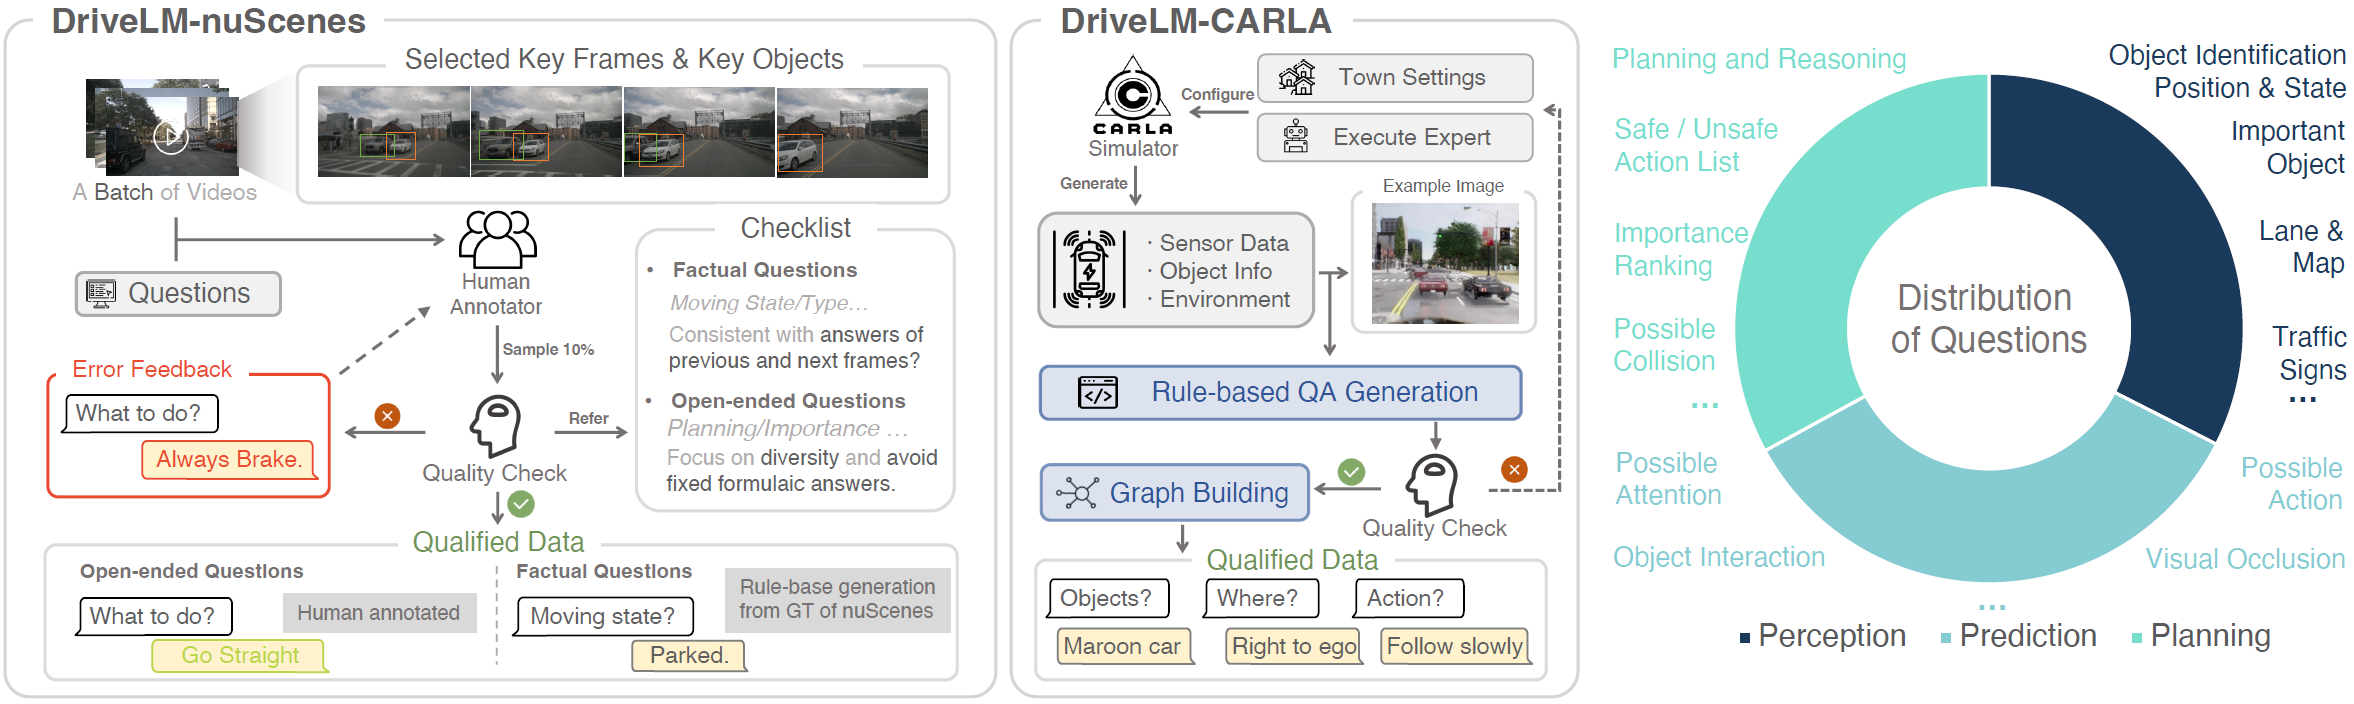
<!-- Figure 2. (Left) Annotation Pipeline: In DriveLM-nuScenes, we adopt a semi-rule-based QA labeling pipeline, where both the ground truth annotation in nuScenes/OpenLane-V2 and feedback from human annotators are used. A critical part of our pipeline is the multi-round quality check, which guarantees high data quality at reasonable costs. In DriveLM-CARLA, we meet the same standards while exploiting a fully rule-based QA labeling pipeline instead. (Right) Question Distribution: The questions in our dataset cover various specific aspects of driving tasks, most of which are annotated by human annotators, making this a suitable proxy for human-like driving reasoning. -->
图2.(左)标注Pipeline: 在 DriveLM-nuScenes 中, 我们采用半基于规则的 QA 标注pipeline, 其中使用 nuScenes/OpenLane-V2 中的真值标注和来自人工标注员的反馈。
我们pipeline的关键部分是多轮质量检查, 它保证以合理的成本提供高的数据质量。
在 DriveLM-CARLA 中, 我们满足相同的标准, 同时利用完全基于规则的 QA 标注 pipeline 替代。
(右)问题分布: 我们数据集中的问题涵盖了驾驶任务的各个具体方面, 其中大部分由人工标注员标注, 使其成为类人驾驶推理的合适智能体。

<!-- Table 1. **Comparison of DriveLM-nuScenes & -CARLA with Existing Datasets**. $^{*}$ indicates semi-rule-based labeling (w/ human annotators), $^{**}$ indicates fully-rule-based (no human annotators), and - means publicly unavailable. DriveLM-Data significant advances annotation quantity, comprehensiveness (covering **perception, prediction and planning**), and logic (chain to **graph**). -->
表1. <span id='table.1'></span>**DriveLM-nuScenes & -CARLA 与现有数据集的对比**。
$^{*}$ 表示半基于规则的标注(有人工标注员), $^{**}$ 表示完全基于规则(无人标注员), - 表示公开不可用。
DriveLM-Data 显着提高了标注数量、全面性(覆盖**感知、预测和规划**)和逻辑(链接到**图**)。
| Dataset | \|\| | Source Dataset | # Frames | Avg. captions / QA per annotated frame | \| | Total captions / QA in Perception | Total captions / QA in Prediction | Total captions / QA in Planning | \| | Logic among captions/QA pairs |
| :- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| nuScenes-QA [55] | \|\| | nuScenes | 34,149 | 13.5 | \| | 460k$^{**}$ | &#10008; | &#10008; | \| | None |
| nuPrompt [79] | \|\| | nuScenes | 34,149 | 1.0 | \| | 35k$^{*}$ | &#10008; | &#10008; | \| | None |
| HAD [35] | \|\| | HDD | 25,549 | 1.8 | \| | 25k | &#10008; | 20k | \| | None |
| BDD-X [34] | \|\| | BDD | 26,228 | 1 | \| | 26k | &#10008; | &#10008; | \| | None |
| DRAMA [47] | \|\| | DRAMA | 17,785 | 5.8 | \| | 85k | &#10008; | 17k | \| | Chain |
| Rank2Tell [59] | \|\| | Rank2Tell | 5,800 | - | \| | - | &#10008; | - | \| | Chain |
| DriveLM-nuScenes | \|\| | nuScenes | 4,871 | **91.4** | \| | 144k$^{*}$ | 153k | 146k | \| | **Graph** |
| DriveLM-CARLA | \|\| | CARLA | **183,373** | 20.5 | \| | **2.46M**$^{**}$ | **578k**$^{**}$ | **714k**$^{**}$ | \| | **Graph** |

## DriveLM-Metrics
<!-- To evaluate GVQA, the DriveLM-Metrics consist of three components for evaluating motion M, behavior B, and P1−3. For measuring the performance of the motion stage, we use standard metrics from the nuScenes and Waymo benchmarks: average and final displacement error, (**ADE, FDE**), and the **collision rate** on the predicted trajectory, following UniAD [26]. We evaluate behavior predictions by the **classification accuracy**, along with a breakdown of the overall accuracy into its steering and speed components. Finally, we measure the P1−3performance using two metrics. **SPICE** [2] is a prevailing metric used in VQA and image captioning, which calculates the structure similarity of predicted texts with ground truth while ignoring the semantic meanings. Simultaneously, we employ **GPT Score** to measure the semantic alignment of answers and complement the SPICE metric. Specifically, the question, the ground truth answer, the predicted answer, and a prompt asking for a numerical score of the answer are sent to ChatGPT-3.5 [50, 51]. We parse the text returned to get the score, where a higher score indicates better semantic accuracy. -->
为了评估 GVQA, DriveLM-Metrics 包含三个部分, 用于评估运动$M$、行为$B$和$P_{1−3}$。
为了测量运动阶段的性能, 我们使用 nuScenes 和 Waymo 基准测试中的标准指标: 平均和最终位移误差(**ADE, FDE**)以及预测轨迹的**碰撞率**, 遵循 UniAD [26]。
我们通过**分类精度**以及将整体精度分解为转向和速度部分, 评估行为预测。
最后, 我们使用两个指标, 衡量$P_{1−3}$的性能。
**SPICE** [2] 是 VQA 和图像字幕中使用的一种流行指标, 它计算预测文本与真值之间的结构相似性, 同时忽略语义含义。
同时，我们采用**GPT 分数**来衡量回答的语义对齐, 并补充 SPICE 指标。
具体来说, 问题、真值回答、预测回答, 以及询问回答得分的提示, 被送到 ChatGPT-3.5 [50, 51]。
我们解析返回的文本以获得分数, 分数越高表示语义准确性越好。

| Language Dataset  | Base Dataset |      Language Form    |   Perspectives | Scale      |  Release?|
|:---------:|:-------------:|:-------------:|:------:|:--------------------------------------------:|:----------:|
| [BDD-X 2018](https://github.com/JinkyuKimUCB/explainable-deep-driving)  |  [BDD](https://bdd-data.berkeley.edu/)  | Description | Perception & Reasoning    | 8M frames, 20k text strings   |**:heavy_check_mark:**|
| [HAD 2019](https://usa.honda-ri.com/had)  |  [HDD](https://usa.honda-ri.com/hdd)  | Advice | Goal-oriented & stimulus-driven advice | 5,675 video clips, 45k text strings   |**:heavy_check_mark:**|
| [DRAMA 2022](https://usa.honda-ri.com/drama)   |    - | Description | Perception & Planning results | 18k frames, 100k text strings | **:heavy_check_mark:**|
| [Rank2Tell 2023](https://arxiv.org/abs/2309.06597)   |   - | Perception & Planning results |  QA + Captions | 5k frames | :x: |
| [nuScenes-QA 2023](https://arxiv.org/abs/2305.14836)   |   [nuScenes](https://www.nuscenes.org/)  | QA |  Perception Result     | 30k frames, 460k generated QA pairs|**:heavy_check_mark:**|
| [nuPrompt 2023](https://arxiv.org/abs/2309.04379)   |   [nuScenes](https://www.nuscenes.org/)  | Object Description |  Perception Result     | 30k frames, 35k semi-generated QA pairs| :x:|
| **DriveLM 2023** | [nuScenes](https://www.nuscenes.org/) | **:boom: QA + Scene Description** | **:boom:Perception, Prediction and Planning with Logic** | 30k frames, 360k annotated QA pairs |**:heavy_check_mark:** |

# DriveLM-Agent: A GVQA Baseline
<!-- In this section, we present DriveLM-Agent, a baseline approach for the GVQA task detailed in Section 2. DriveLM-Agent is built upon a general vision-language model and can therefore exploit underlying knowledge gained during pre-training. Our overall goal involves translating an image into the desired ego vehicle motion (M) through the different stages of VQA (P1, P2, P3,B). For this, we choose BLIP-2 [40] as our base VLM due to its simplicity in architecture and flexibility in fine-tuning, but the proposed approach can be applied agnostically to other VLMs. -->
在本节中, 我们介绍 DriveLM-Agent, 这是第 [2](#DriveLM:-Task,-Data,-Metrics) 节中详细介绍的 GVQA 任务的基线方法。
DriveLM-Agent 基于通用视觉语言模型构建, 因此可以利用在预训练期间获得的潜在知识。
我们的总体目标涉及通过 VQA 的不同阶段($P_1$、$P_2$、$P_3$、$B$)将图像转化为所需的自车运动($M$)。
为此, 我们选择 BLIP-2 [40] 作为我们的基础 VLM, 由于其架构简单且微调灵活, 但所提出的方法可以不可知地应用于其他 VLMs。

<!-- As shown in Fig. 3, DriveLM-Agent can be decomposed into several stages: (1) P1−3, i.e., perception, prediction, planning, serve as the foundational layers to understand the scene and reason about its structure. (2) The behavior stage aggregates crucial information from the P1−3 into a description of the desired driving action in language space. (3) Finally, the motion stage translates the behavior into an executable driving trajectory. To implement the logical dependency between each linked QA, we propose to use context between connected nodes in the GVQA graph. We expand on this idea in the following. -->
如[图3](#fig.3)所示, DriveLM-Agent可以分解为几个阶段:
(1) $P_{1−3}$, 即感知、预测、规划, 作为基础层, 理解场景并解释其结构。
(2) 行为阶段将 $P_{1−3}$ 中的关键信息聚合为语言空间中所需的驾驶动作的描述。
(3) 最后, 运动阶段将行为转化为可执行的驾驶轨迹。
为了实现每个关联的 QA 之间的逻辑依赖关系, 我们提出在 GVQA 图中的相连顶点之间使用上下文。
我们将在下面进一步阐述这个想法。

## Prompting with Context
<!-- Directly translating images to motion as in [12, 54] is extremely challenging. Motivated by the tendency of humans to perform a multi-step reasoning process, we propose to use a similar strategy for VLM-based driving. By doing so, we facilitate the retrieval of knowledge stored in LLMs and improve explainability. -->
像[12, 54]那样直接将图像转化为运动是极具挑战性的。
受人类倾向执行多步骤推理过程的启发, 我们建议(对基于 VLM 的驾驶)使用类似策略。
这样我们方便利用LLMs中存储的知识, 并提高可解释性。

<!-- More precisely, the model is designed to use answers from the previous steps in the reasoning process as the context for the following questions. For each edge $e = (v_p, v_c) \in E$, we append the QA from the parent node $v_p$ to the question of the current node $v_c$ with a prefix "Context: ". The context can also contain QAs from multiple preceding nodes in which case we concatenate all QAs to one context sequence. It is worth noting that the context is only one possible implementation to formulate logical dependency in GVQA, which we select due to its simplicity. With this scheme, we pass forward relevant information based on the logical dependencies established by the graph. -->
更准确地说, 该模型旨在推理过程中, 使用先前步骤的回答, 作为后续问题的上下文。
对于每条边 $e = (v_p, v_c) \in E$, 我们将来自父节点 $v_p$ 的 QA 附加到当前节点 $v_c$ 的问题, 并带有前缀"Context: "。
上下文还可以包含来自多个先前节点的 QAs, 在这种情况下, 我们将所有 QAs 串联到一个上下文序列。
值得注意的是, 上下文只是一种(在GVQA 中建立逻辑依赖关系的)可能的实现方式, 我们选择它是因为它的简单性。
在该方案中, 我们基于由图建立的逻辑依赖关系, 向前传递相关信息。

<!-- Note that the size and structure of the graph during inference is a design choice of the algorithm, which can be adapted based on the task or available compute budget. We use this property to train on all available QAs, but perform inference on specific subgraphs, where the questions are sampled using heuristics. For more details, please refer to the supplementary material. -->
请注意, 推理过程中图的大小和结构是算法的设计选择, 可以根据任务或可用的计算预算进行调整。
我们使用此属性, 训练所有可用的 QAs, 但在特定子图上进行推理, 其中使用启发式对问题进行采样。
了解更多详情, 请参阅补充材料。

## Context Aggregation through Behavior
<!-- Driving encompasses a wide array of potential situations that require an appropriate response. However, despite the diversity of these circumstances, it is interesting to note that almost all events involve decisions that can be discretized into a set of behaviors. For example, applying the brakes appropriately may address various situations such as a red light signal, a stop sign, or the presence of an object ahead of the vehicle. The focus of our behavior stage is to generate such a behavior: a statement in natural language that articulates the vehicle's intended movement. In our methodology, the behavior is a textual description of the observed future vehicle motion, and it can also be represented as the category $(B_{sp}, B_{st})$ which is divided into components for steering and speed (as described in Section 2.1). This description effectively serves as a reflective step wherein the model extracts and summarizes all crucial information from the graph. To this end, we propose to use all possible sources of context for predicting behavior, i.e., all the QAs in $P_{1−3}$. We empirically observe that having a reflective behavior step is crucial for driving with VLMs, and our design choice of using all possible context sources outperforms the naïve approach of only using $P_3$. -->
驾驶涉及多种(需要适当响应的)潜在情况。
然而, 尽管这些情况各不相同, 但有趣的是, 几乎所有事件都涉及决策, 决策可以离散化为一组行为。
例如，适当地使用刹车可以解决多种情况, 例如红灯信号、停车标志或车辆前方存在物体。
我们行为阶段的重点是生成行为: 用自然语言描述车辆的预期运动。
在我们的方法中, 行为是观察到的未来车辆运动的文本描述, 它也可以表示为类别 $(B_{sp}, B_{st})$, 该类别分为转向和速度分量(如第 [2.1](#DriveLM-Task:-GVQA) 节所述)。
该描述有效地充当一个深思步骤, 其中模型从图中提取并总结了所有关键信息。
为此, 我们提出使用所有可能的上下文来源, 即 $P_{1−3}$ 中的所有 QAs, 用于预测行为。
我们根据经验观察到, 深思行为步骤对于使用 VLMs的驾驶至关重要, 并且我们使用所有可能的上下文来源的设计选择优于仅使用 $P_3$ 的简单方法。

## Trajectory Tokenization for Motion
<!-- Since it is non-trivial to output fine-grained numerical results using general VLMs, RT-2 [85] handles robotic actions based on a specialized trajectory tokenization module. We use this approach to enable DriveLM-Agent to take as input the image and behavior description and output trajectories. Specifically, we divide the coordinates of waypoints into 256 bins empirically based on the statistics of the train set trajectories. We re-define tokens in the BLIP-2 language tokenizer, establishing tokens for each bin, and fine-tune the VLM on this redefined vocabulary. For simplicity, we use the same VLM architecture (BLIP-2) to perform this task, but with independent LoRA weights and trained on a dataset consisting of only the QAs for this motion stage. Thus, it is possible to perform this functionality using a lightweight LLM [56] or driving-specific architecture that accepts a command as an input [25, 80]. -->
由于使用通用 VLMs 输出细粒度的数值结果并非易事, 因此 RT-2 [85] 基于专门的轨迹词元化模块处理机器人动作。
我们使用这种方法, 使 DriveLM-Agent 能够将图像和行为描述作为输入, 并输出轨迹。
具体来说, 我们基于训练集轨迹的统计, 经验地将途径点坐标分为 256 个 bins。
我们重新定义了 BLIP-2 语言词元分析器中的词元, 为每个 bin 构建词元, 并在这个重新定义的词表上微调 VLM。
为简单起见, 我们使用相同的 VLM 架构 (BLIP-2) 来执行此任务, 但具有独立的 LoRA 权重, 并在(仅包含此运动阶段的 QAs 的)数据集上进行训练。
因此, 可以使用轻量级 LLM [56] 或(接受命令作为输入的)驾驶专用架构, 来执行此功能 [25, 80]。

# Experiments
<!-- In this section, we present our experimental results that aim to address the following research questions: (1) How can VLMs be effectively repurposed for end-to-end autonomous driving? (2) Can VLMs for driving generalize when evaluated (a) with unseen sensor setups; and (b) on objects unseen during training? (3) How well do VLMs perform perception, prediction, and planning via GVQA? -->
在本节中, 我们介绍我们的实验结果, 旨在解决下列研究问题: 
(1) 如何有效地将VLMs用于端到端自动驾驶? 
(2) (a)在使用未见过的传感器配置下, (b) 对训练期间未见过的物体, 进行评估时, 用于驾驶的VLMs能否泛化? 
(3) VLMs 通过 GVQA 执行感知、预测和规划的效果如何?

<!-- **Setup**. We now briefly overview the key implementation details for the two settings used in our experiments (additional details are provided in the supplementary material). All fine-tuning is implemented with LoRA [24]. On DriveLM-nuScenes, we finetune BLIP-2 on the train split for 10 epochs. We use a batch size of 2 for each GPU, and the entire training process spans approximately 7 hours with 8 V100 GPUs. We train BLIP-2 on a 1/20 temporally sub-sampled train split of DriveLM-CARLA for 6 epochs. This takes 6 hours on 4 A100 GPUs. -->
**配置**。现在, 我们简要概述实验中使用的两种配置的关键实现细节(补充材料中提供了更多详细信息)。
所有微调都通过 LoRA [24] 实现。
在 DriveLM-nuScenes 上, 我们在训练分割上, 对 BLIP-2 进行了 10 个 epochs 的微调。
我们在每个 GPU 采用批量大小为2, 整个训练过程在 8 个 V100 GPUs 上处理时长大约 7 个小时。
我们在 DriveLM-CARLA 的 1/20 时间子采样训练分割上对 BLIP-2 进行了 6 个 epochs 的训练。这在 4 个 A100 GPUs 上花费 6 个小时。

## VLMs for End-to-End Driving
<!-- In our first experiment, we aim to assess the ability of VLMs to perform open-loop planning on DriveLM-nuScenes. In particular, we investigate the impact of the context provided to the behavior and motion stages. Given sensor data (and in the case of VLM methods, a text input), the model is required to predict the ego-vehicle future trajectory in the form of waypoints. -->
在我们的第一个实验中, 我们的目的是评估 VLMs 在 DriveLM-nuScenes 上执行开环规划的能力。
特别是, 我们调查了提供的上下文对行为和运动阶段的影响。
给定传感器数据(在 VLM 方法的情况下, 为文本输入), 模型需要(以途径点的形式)预测自车的未来轨迹。

<!-- **Baselines**. As a reference for the difficulty of the task, we provide a simple **Command Mean** baseline. Each frame in nuScenes is associated with one of 3 commands, 'turn left', 'turn right', or 'go straight'. We output the mean of all trajectories in the training set whose command matches the current test frame command. Further, we compare our approach to the current state-of-the-art on nuScenes, UniAD [26]. Besides the author-released checkpoint, which requires video inputs, we train a single-frame version ('**UniAD-Single**') for a fair comparison to our single-frame VLMs. Finally, BLIP-RT-2 denotes BLIP-2 [40] fine-tuned on DriveLM-Data with the trajectory tokenization scheme described in Section 3.3 for only the motion task. This acts as an indicator for the performance when using an identical network architecture as DriveLM-Agent, but no context inputs or VQA training data. -->
**基线**. 作为任务难度的参考, 我们提供了一个简单的**Command Mean**基线。
nuScenes 中的每一帧都与 3 个命令('左转'、'右转'或'直行')之一相关联。
我们输出训练集中所有轨迹的平均值，其命令与当前测试帧命令匹配。
此外, 我们将我们的方法与 nuScenes上当前最先进的方法——UniAD [26]进行比较。
除了作者发布的需要视频输入的检查点之外, 我们还训练单帧版本('**UniAD-Single**'), 以便与我们的单帧 VLMs 进行公平比较。
最后, **BLIP-RT-2**表示使用(第 [3.3](#Trajectory-Tokenization-for-Motion) 节中描述的仅用于运动任务的)轨迹词元化方案在 DriveLM-Data 上的 BLIP-2 [40]微调。
当使用与 DriveLM-Agent 相同的网络架构, 但没有上下文输入或 VQA 训练数据时, 这可作为性能指标。

<!-- **DriveLM-Agent**. We consider 3 variants of DriveLM-Agent incorporating our proposed changes in steps: (1) a 2-stage version that predicts behavior and then motion (as described in Section 2.1), but without any P1−3 context for behavior prediction ('None'); (2) a 'Chain' version that builds the P1−3 graph, but only passes the final node (P3) to the behavior stage; (3) the full model ('Graph') that uses all QAs from P1−3 as context for B. -->
**DriveLM-Agent**. 我们考虑了 DriveLM-Agent 的 3 种变体, 将我们建议的更改分为以下步骤:
(1) 两阶段版本, 先预测行为, 然后运动(如第 [2.1](#DriveLM-Task:-GVQA) 节所述), 但没有任何用于行为预测的$P_{1−3}$上下文('None');
(2) 链式版本('Chain'), 构建$P_{1−3}$图, 但仅将最终顶点 ($P_3$) 传递到行为阶段; 
(3) 完整模型('Graph'), 使用$P_{1−3}$中的所有 QAs 作为 $B$ 的上下文。

<!-- **Results**. We show the results for the methods listed above in Table 2. Among the baselines, BLIP-RT-2 is unable to match UniAD-Single (though both methods perform well relative to Command Mean). This shows that the singlestage approach without any reasoning is unable to compete with the prior state-of-the-art on nuScenes. However, the proposed DriveLM-Agent, which predicts behavior as an intermediate step for motion, provides a significant boost in performance, surpassing UniAD-Single. This indicates that with the appropriate prompting, VLMs can be surprisingly competitive for end-to-end driving. Interestingly, in the experimental setting of Table 2 which does not involve generalization, the Chain and Graph versions of DriveLM-Agent do not provide any further advantage over no context. Further, single-frame VLMs fall short in comparison to the privileged video-based UniAD model, indicating that VLMs with video inputs may be necessary for this task. -->
**结果**。 我们在[表2](#table.2)中展示了前面所列方法的结果。
在基线中, BLIP-RT-2 无法与 UniAD-Single 匹配(尽管两种方法相对于 Command Mean 均表现很好)。
这表明没有任何推理的单阶段方法无法与 nuScenes 上先前最先进技术竞争。
然而, 所提出的 DriveLM-Agent, 将预测的行为作为运动的中间步骤, 显着地提高了性能, 超越了 UniAD-Single。
这表明, 在适当的提示下, VLMs 在端到端驾驶方面具有惊人的竞争力。
有趣的是, 在[表2](#table.2)的实验配置中, 不涉及泛化, DriveLM-Agent 的Chain 和 Graph版本(相对于没有上下文)没有提供任何进一步的优势。
此外, 与基于视频的特权 UniAD 模型相比, 单帧 VLMs 存在不足, 这表明具有视频输入的 VLMs 对于该任务可能是必要的。

<!-- Table 2. **Open-loop Planning on DriveLM-nuScenes**. Using Behavior (B) as context for Motion (M) enables end-to-end driving with VLMs on par with UniAD-Single, a state-of-the-art driving-specific architecture. -->
表2. <span id='table.2'></span> **DriveLM-nuScene 上的开环规划**。使用行为 ($B$) 作为运动 ($M$) 的上下文, 通过 VLMs 实现端到端驾驶, 与最先进的驾驶专用架构 UniAD-Single 相当。
<table>
<thead>
  <tr>
    <th style="text-align: left" rowspan="2">Method</th>
    <th style="text-align: center" rowspan="2">Behavior Context</th>
    <th style="text-align: center" rowspan="2">Motion Context</th>
    <th style="text-align: center" colspan="3">Behavior ($B$)</th>
    <th style="text-align: center" colspan="2">Motion ($M$)</th>
  </tr>
  <tr>
    <th style="text-align: center">Acc. $\uparrow$</th>
    <th style="text-align: center">Speed $\uparrow$</th>
    <th style="text-align: center">Steer $\uparrow$</th>
    <th style="text-align: center">ADE $\downarrow$</th>
    <th style="text-align: center">Col. $\downarrow$</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="text-align: left">Command Mean</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">4.57</td>
    <td style="text-align: center">5.72</td>
  </tr>
  <tr>
    <td style="text-align: left">UniAD-Single</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">1.80</td>
    <td style="text-align: center">2.62</td>
  </tr>
  <tr>
    <td style="text-align: left">BLIP-RT-2</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">2.63</td>
    <td style="text-align: center">2.77</td>
  </tr>
  <tr>
    <td style="text-align: left" rowspan="3">DriveLM-Agent</td>
    <td style="text-align: center">None</td>
    <td style="text-align: center">$B$</td>
    <td style="text-align: center">$$\textbf{61.45}$$</td>
    <td style="text-align: center">$$\textbf{72.20}$$</td>
    <td style="text-align: center">$$\textbf{84.73}$$</td>
    <td style="text-align: center">$$\textbf{1.39}$$</td>
    <td style="text-align: center">$$\textbf{1.67}$$</td>
  </tr>
  <tr>
    <td style="text-align: center">Chain</td>
    <td style="text-align: center">$B$</td>
    <td style="text-align: center">50.43</td>
    <td style="text-align: center">60.32</td>
    <td style="text-align: center">75.34</td>
    <td style="text-align: center">2.07</td>
    <td style="text-align: center">2.08</td>
  </tr>
  <tr>
    <td style="text-align: center">Graph</td>
    <td style="text-align: center">$B$</td>
    <td style="text-align: center">57.49</td>
    <td style="text-align: center">69.89</td>
    <td style="text-align: center">80.63</td>
    <td style="text-align: center">1.74</td>
    <td style="text-align: center">1.89</td>
  </tr>
  <tr>
    <td style="text-align: left">UniAD [26]</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">0.80</td>
    <td style="text-align: center">0.17</td>
  </tr>
</tbody>
</table>

## Generalization Across Sensor Configurations
<!-- As a more challenging setting for evaluating the models from Section 4.1, we now apply them without any further training to a new domain: the Waymo dataset [63]. Waymo's sensor setup does not include a rear camera, so we drop this input from UniAD-Single. The VLM methods only use the front view and do not require any adaptation. -->
作为一个更具挑战性的配置, 以评估第 [4.1](#VLMs-for-End-to-End-Driving) 节中的模型, 我们在无任何进一步训练的前提下, 将它们应用到一个新领域: Waymo 数据集 [63]。
Waymo 的传感器配置不包括后置摄像头, 因此我们放弃了 UniAD-Single 的这项输入。
VLM 方法仅使用前视图, 不需要任何调整。

<!-- **Results**. As shown in Table 3, UniAD-Single does not cope well with the new sensor configuration, and drops below BLIP-RT-2 in performance. The multi-stage approach of DriveLM-Agent provides further improvements. In particular, the accuracy of speed predictions rises from 43.90 with no context to 54.29 with the full graph. On the other hand,the chain approach does not provide sufficient useful information, with a speed accuracy of only 41.28. -->
**结果**. 如[表3](#table.3)所示, UniAD-Single 不能很好地应付新的传感器配置, 性能低于 BLIP-RT-2。
DriveLM-Agent 的多阶段方法提供了进一步的改进。
特别是, 速度预测的准确性从无上下文的 43.90 上升到完整图的 54.29。
另一方面, 链式方法没有提供足够的有用信息, 速度精度仅为41.28。

<!-- Table 3. **Zero-shot Generalization across Sensor Configurations**. Results on 1k randomly sampled frames from the Waymo val set after training on DriveLM-nuScenes. DriveLM-Agent outperforms UniAD-Single and benefits from graph context. -->
表3. <span id='table.3'></span> **跨传感器配置的零样本泛化**。
在 DriveLM-nuScenes 上训练后, Waymo验证集中 1k 个随机采样帧的结果。
DriveLM-Agent 的性能优于 UniAD-Single, 受益于图的上下文。
<table>
<thead>
  <tr>
    <th style="text-align: left" rowspan="2">Method</th>
    <th style="text-align: center" rowspan="2">Behavior Context</th>
    <th style="text-align: center" rowspan="2">Motion Context</th>
    <th style="text-align: center" colspan="3">Behavior ($B$)</th>
    <th style="text-align: center" colspan="2">Motion ($M$)</th>
  </tr>
  <tr>
    <th style="text-align: center">Acc. $\uparrow$</th>
    <th style="text-align: center">Speed $\uparrow$</th>
    <th style="text-align: center">Steer $\uparrow$</th>
    <th style="text-align: center">ADE $\downarrow$</th>
    <th style="text-align: center">Col. $\downarrow$</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="text-align: left">Command Mean</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">7.98</td>
    <td style="text-align: center">11.41</td>
  </tr>
  <tr>
    <td style="text-align: left">UniAD-Single</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">4.16</td>
    <td style="text-align: center">9.31</td>
  </tr>
  <tr>
    <td style="text-align: left">BLIP-RT-2</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">2.78</td>
    <td style="text-align: center">6.47</td>
  </tr>
  <tr>
    <td style="text-align: left" rowspan="3">DriveLM-Agent</td>
    <td style="text-align: center">None</td>
    <td style="text-align: center">$B$</td>
    <td style="text-align: center">35.70</td>
    <td style="text-align: center">43.90</td>
    <td style="text-align: center">65.20</td>
    <td style="text-align: center">2.76</td>
    <td style="text-align: center">6.59</td>
  </tr>
  <tr>
    <td style="text-align: center">Chain</td>
    <td style="text-align: center">$B$</td>
    <td style="text-align: center">34.62</td>
    <td style="text-align: center">41.28</td>
    <td style="text-align: center">64.55</td>
    <td style="text-align: center">2.85</td>
    <td style="text-align: center">6.89</td>
  </tr>
  <tr>
    <td style="text-align: center">Graph</td>
    <td style="text-align: center">$B$</td>
    <td style="text-align: center">$$\textbf{39.73}$$</td>
    <td style="text-align: center">$$\textbf{54.29}$$</td>
    <td style="text-align: center">$$\textbf{70.35}$$</td>
    <td style="text-align: center">$$\textbf{2.63}$$</td>
    <td style="text-align: center">$$\textbf{6.17}$$</td>
  </tr>
</tbody>
</table>

<!-- We present qualitative results for DriveLM-Agent on nuScenes and Waymo in Fig. 4. The model generally provides intuitive answers, with a few exceptions (e.g., planning on DriveLM-nuScenes, perception on Waymo). This shows the utility of GVQA towards interactive driving systems. Further, on Waymo, we see meaningful prediction and planning answers despite the imperfect perception. For more visualizations, please see the supplementary material. -->
我们在[图4](#fig.4)中展示了 nuScenes 和 Waymo 上 DriveLM-Agent 的定性结果。
该模型通常提供直观的回答, 有一些例外(例如, DriveLM-nuScenes 上的规划、Waymo 上的感知)。
这显示了 GVQA 对于交互式驾驶系统的实用性。
此外, 在 Waymo 上, 尽管感知不完美, 但我们看到了富有意义的预测和规划回答。
如需更多可视化, 请参阅补充材料。

<span id='fig.4'></span>
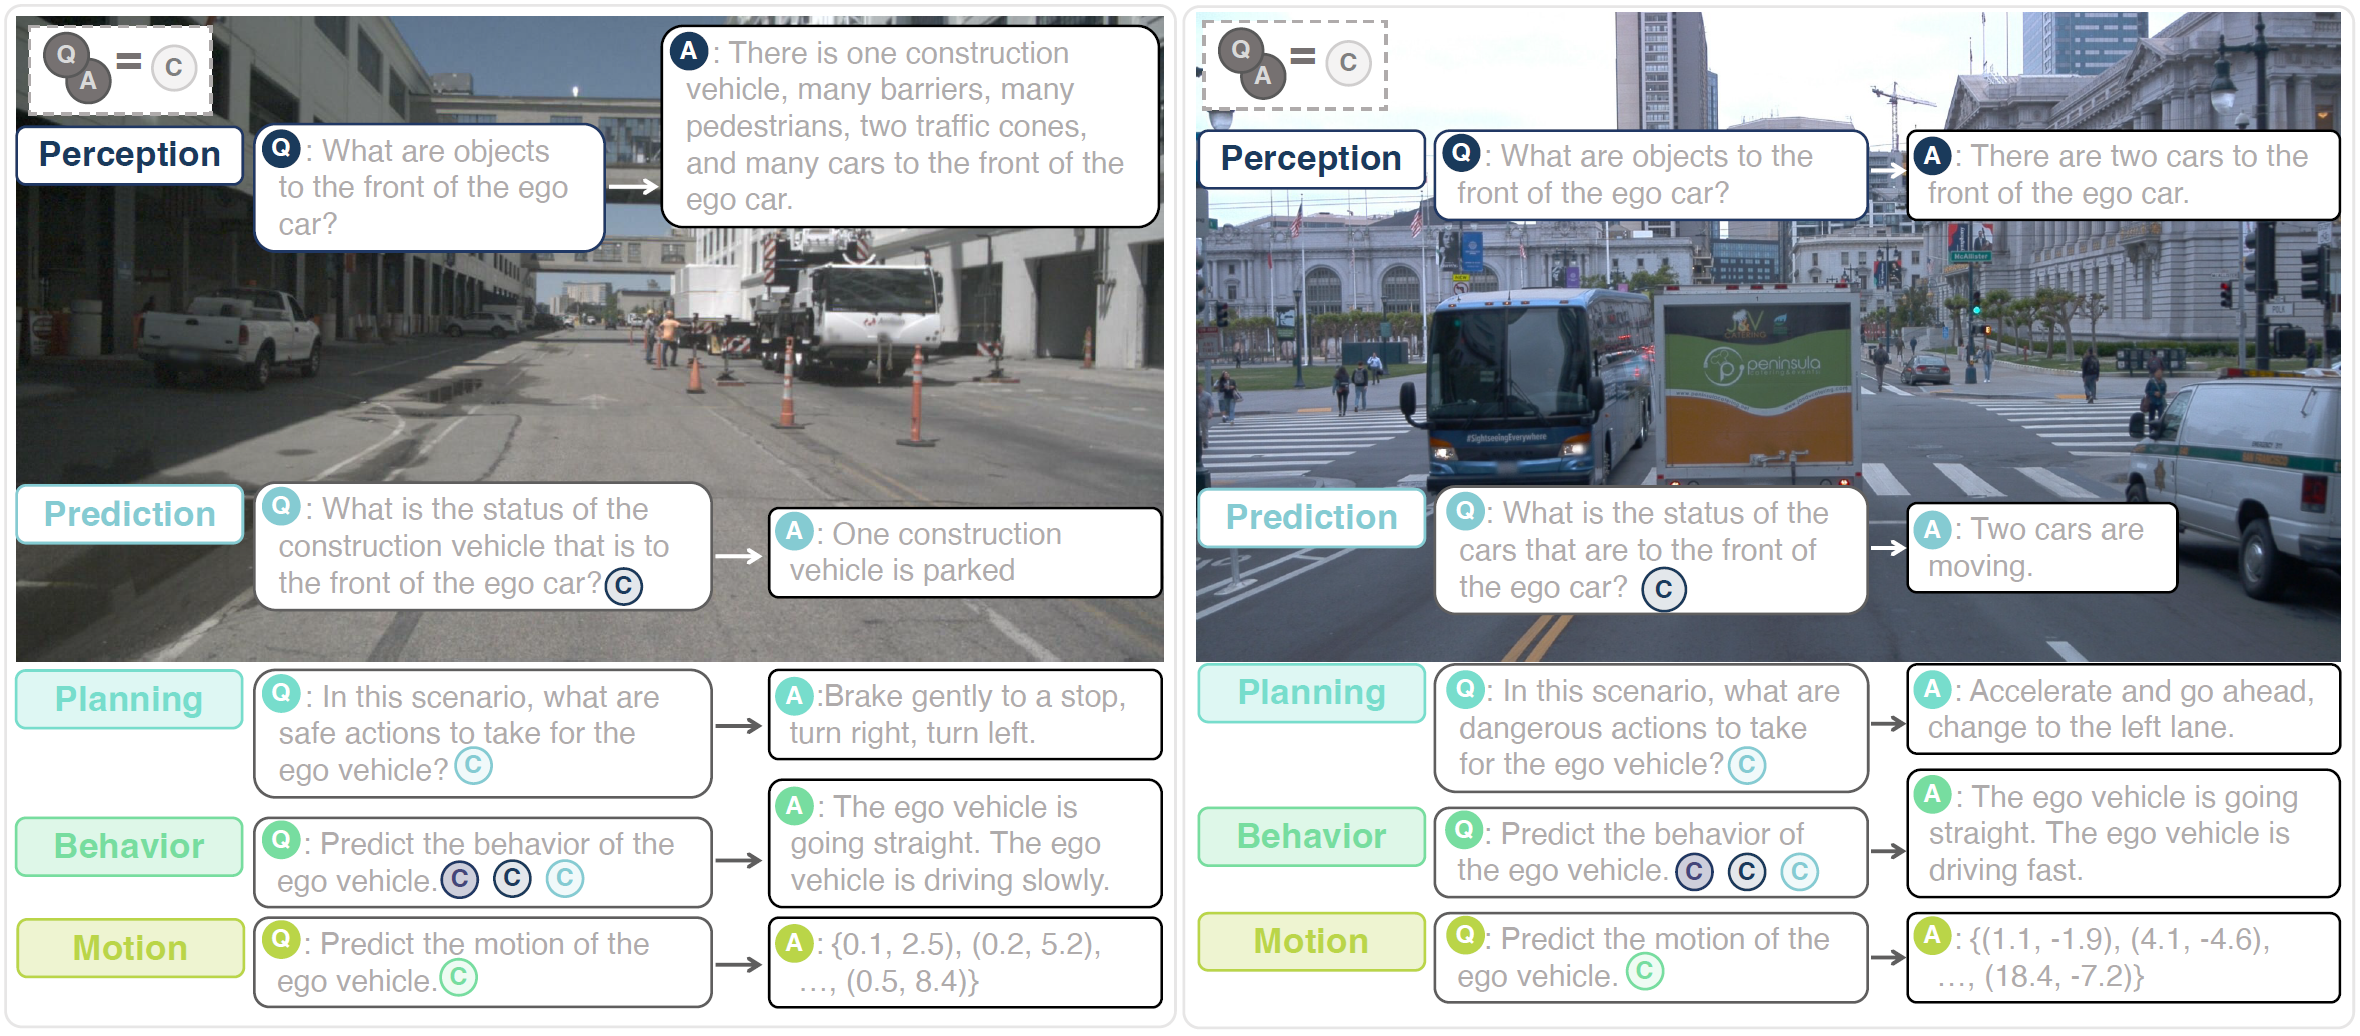
<!-- Figure 4. **Qualitative Results of DriveLM-Agent**. (Left) DriveLM-nuScenes val frame, (Right) Waymo val frame. We show the questions (Q), context (C), and predicted answers (A). DriveLM-Agent’s outputs are easy to interpret for human users. -->
图 4. **DriveLM-Agent 的定性结果**。(左)DriveLM-nuScenes 验证框架, (右)Waymo 验证框架。
我们展示了问题 (Q)、上下文 (C) 和预测回答 (A)。 DriveLM-Agent 的输出对于人类用户来说很容易理解。

## Generalization to Unseen Objects
<!-- Next, we evaluate zero-shot generalization to novel objects. DriveLM-CARLA is collected without any pedestrians in the training or validation splits. We now generate a new test set called DriveLM-CARLA-ped, which only consists of frames where a pedestrian is present in the scene. The correct behavior is to stop for the pedestrian. -->
接下来, 我们评估对新对象的零样本泛化。 DriveLM-CARLA 收集时, 在训练或验证分组中没有任何行人。
我们现在生成一个名为 DriveLM-CARLA-ped 的新测试集, 它仅包含场景中存在行人的帧。
正确的行为是为行人停车。

<!-- **Baselines**. For this experiment, we compare DriveLM-Agent to TransFuser++ [30], the state-of-the-art for CARLA. It uses a larger input image, an additional LiDAR sensor, and several driving-specific annotations (depth, semantics, 3D bounding boxes, HD map) in comparison to DriveLM-Agent. However, because of these task-specific inputs and outputs, TransFuser++ can only be trained on the base DriveLM-CARLA dataset and cannot incorporate general computer vision data during training, which makes generalization more challenging. -->
**基线**. 在本实验中, 我们将 DriveLM-Agent 与 TransFuser++ [30] 进行比较, 后者是 CARLA 的最新技术。
与 DriveLM-Agent 相比, 它使用更大的输入图像、额外的 LiDAR 传感器和一些驾驶专用标注(深度、语义、3D 边界框、高清地图)。
然而, 由于这些任务专用的输入和输出, TransFuser++ 只能在基础 DriveLM-CARLA 数据集上进行训练, 并且无法在训练期间兼容通用计算机视觉数据, 这使得泛化更具挑战性。

<!-- **DriveLM-Agent**. Taking advantage of the more general architecture of a VLM, we include samples from COCO [44] and GQA [28] along with DriveLM-CARLA during training for DriveLM-Agent. We compare several versions: (1) we investigate the addition of a new P1 question during inference, 'Is there a person crossing the road?' ('+ Pedestrian QA'). (2) As an upper bound, we directly input the ground truth P1−3 graph to the model during inference, instead of the model's predictions. For more details, please refer to the supplementary material. -->
**DriveLM-Agent**。利用 VLM 的更通用架构，我们在 DriveLM-Agent 训练期间, 包含来自 COCO [44] 和 GQA [28] 的样本以及 DriveLM-CARLA。
我们比较几个版本:
(1) 我们调查了在推理期间添加一个新的 $P_1$ 问题, '有人过马路吗?'('+ Pedestrian QA')。
(2) 作为上限, 我们在推理期间直接将真值$P_{1−3}$图输入到模型中, 而不是模型的预测。
欲了解更多详情, 请参阅补充材料。

<!-- **Results**. We present our findings in Table 4. We observe that TransFuser++ struggles on DriveLM-CARLA-ped relative to DriveLM-CARLA, with a drop in accuracy from 70.19 to just 8.72. DriveLM-Agent experiences a similar drop from 59.63 to 4.59. However, adding the pedestrian QA significantly boosts performance on the generalization setting to 27.04, albeit with slightly reduced accuracy on regular scenes. This is mainly attributed to the fact that the VLM is not able to detect all pedestrians correctly. This indicates that the large performance gains of recently published VLMs [21, 53] can support even better generalization ability in the domain of driving. Additionally, when the pedestrian QA is provided in the privileged setting that assumes access to perfect context for each question in the graph, DriveLM-Agent achieves a near-perfect score (20.92 $\to$ 92.35) on the frames with pedestrians. Note that DriveLM-CARLA-ped only contains pedestrians crossing a straight road, so all models obtain a 100% accuracy on the steering class (which is always straight). -->
**结果**. 我们在[表4](#table.4)中展示了我们的发现。
我们观察到, 相对于 DriveLM-CARLA, TransFuser++ 在 DriveLM-CARLA-ped 上表现不佳, 准确率从 70.19 下降到仅 8.72。
DriveLM-Agent 也经历了类似的下降, 从 59.63 降至 4.59。
然而, 添加行人 QA 将泛化配置的性能显着地提高到 27.04, 尽管在常规场景上准确性略有下降。
这主要是由于 VLM 无法正确检测所有行人。
这表明<font color="red">最近发布的 VLMs [21, 53] 的巨大性能提升可以支持驾驶领域更好的泛化能力</font>。
此外, 当在特权配置中提供行人 QA 时, 该配置假设可以访问图中每个问题的完美上下文, DriveLM-Agent 在有行人的帧上获得近乎完美的分数 (20.92 $\to$ 92.35)。
请注意, DriveLM-CARLA-ped 仅包含穿过直路的行人, 因此所有模型在转向类别(始终是直行)上获得 100% 的准确度。

<!-- Table 4. **Generalization in DriveLM-CARLA**. All methods underperform on DriveLM-CARLA-ped with the novel pedestrian object, but DriveLM-Agent can be significantly improved by including a pedestrian-specific question in its GVQA graph. -->
表4. <span id='table.4'></span> **DriveLM-CARLA 中的泛化**。所有方法在(带有新的行人对象的)DriveLM-CARLA-ped 上均表现不佳, 但是 DriveLM-Agent 可以(通过在其 GVQA 图中包含行人专用问题)显着改进。
<table>
<thead>
  <tr>
    <th style="text-align: left" rowspan="2">Method</th>
    <th style="text-align: center" colspan="3">DriveLM-CARLA ($B$)</th>
    <th style="text-align: center" colspan="3">DriveLM-CARLA-ped ($B$)</th>
  </tr>
  <tr>
    <th style="text-align: center">Acc. $\uparrow$</th>
    <th style="text-align: center">Spd. $\uparrow$</th>
    <th style="text-align: center">Str. $\uparrow$</th>
    <th style="text-align: center">Acc. $\uparrow$</th>
    <th style="text-align: center">Spd. $\uparrow$</th>
    <th style="text-align: center">Str. $\uparrow$</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="text-align: left">TransFuser++ [30]</td>
    <td style="text-align: center">$$\textbf{70.19}$$</td>
    <td style="text-align: center">$$\textbf{73.29}$$</td>
    <td style="text-align: center">$$\textbf{90.68}$$</td>
    <td style="text-align: center">8.72</td>
    <td style="text-align: center">8.72</td>
    <td style="text-align: center">100.00</td>
  </tr>
  <tr>
    <td style="text-align: left">DriveLM-Agent</td>
    <td style="text-align: center">59.63</td>
    <td style="text-align: center">61.50</td>
    <td style="text-align: center">78.26</td>
    <td style="text-align: center">4.59</td>
    <td style="text-align: center">4.59</td>
    <td style="text-align: center">100.00</td>
  </tr>
  <tr>
    <td style="text-align: left">+ Pedestrian QA</td>
    <td style="text-align: center">52.17</td>
    <td style="text-align: center">55.28</td>
    <td style="text-align: center">77.64</td>
    <td style="text-align: center">$$\textbf{27.04}$$</td>
    <td style="text-align: center">$$\textbf{27.04}$$</td>
    <td style="text-align: center">100.00</td>
  </tr>
  <tr>
    <td style="text-align: left">DriveLM-Agent (GT)</td>
    <td style="text-align: center">60.25</td>
    <td style="text-align: center">65.22</td>
    <td style="text-align: center">80.12</td>
    <td style="text-align: center">20.92</td>
    <td style="text-align: center">20.92</td>
    <td style="text-align: center">100.00</td>
  </tr>
  <tr>
    <td style="text-align: left">+ Pedestrian QA</td>
    <td style="text-align: center">60.25</td>
    <td style="text-align: center">65.22</td>
    <td style="text-align: center">80.12</td>
    <td style="text-align: center">92.35</td>
    <td style="text-align: center">92.35</td>
    <td style="text-align: center">100.00</td>
  </tr>
</tbody>
</table>

## Performance for $P_{1−3}$ via GVQA
<!-- In our final experiment, we establish baseline results for the $P_{1−3}$ stages of GVQA, studying the impact of context. We use two VLMs, the off-the-shelf BLIP-2 [40] model (which is not fine-tuned on DriveLM), as well as the proposed DriveLM-Agent. -->
在我们的最终实验中, 我们为 GVQA 的 $P_{1−3}$ 阶段建立了基线结果, 研究了上下文的影响。
我们使用两个 VLMs, 即现成的 BLIP-2 [40] 模型（未在 DriveLM 上进行微调）以及提出的 DriveLM-Agent。

<!-- **Baselines**. We consider the lower bound of no context ('None'), which corresponds to training and evaluation with the same setting as standard VQA (image and question in, answer out). As an upper bound for each architecture, we perform GVQA but input the ground truth ('GT') context to the model at test time instead of its own prior predictions. -->
**基线**. 我们考虑无上下文的下限('None'), 它对应于与标准 VQA 相同配置的训练和评估(图像和问题作为输入, 回答作为输出)。
作为每个架构的上限, 我们执行 GVQA, 但在测试时将真值('GT')上下文输入到模型中, 而不是模型自己的先前预测。

<!-- **Results**. Our results are summarized in Table 5. Firstly, we observe that DriveLM-nuScenes is significantly more challenging for both models, as indicated by the lower scores on this dataset relative to DriveLM-CARLA in all context settings. This is likely due to the higher diversity in human answers obtained for DriveLM-nuScenes, as opposed to the rule-based generation in CARLA. On both datasets, we observe that DriveLM-Agent, which is fine-tuned on DriveLM, significantly outperforms BLIP-2 which is applied in a zero-shot manner. We also observe the SPICE and GPT score metrics to be misaligned, in particular for BLIP-2. Interestingly, on DriveLM-CARLA, BLIP-2 with GT context gains over 25 points in terms of SPICE accompanied by a small drop in GPT score compared to the no context version. This shows that current VLMs are able to mimic the sentence structure and style of the provided context, but face challenges in performing logical reasoning. Overall, we conclude that DriveLM-Agent can obtain a reasonable baseline performance on P1−3 question answering without context. However, specialized architectures or prompting schemes beyond naive concatenation may be necessary to make better use of the logical dependencies in GVQA. -->
**结果**. 我们的结果总结在[表5](#table.5)中。
首先, 我们观察到 DriveLM-nuScenes 对于这两个模型来说都更具挑战性, 正如(所有上下文设置中)在该数据集上的较低分数所示, 相对于 DriveLM-CARLA。
这可能是由于在DriveLM-nuScenes上获得的人类回答具有更高的多样性, 而不是 CARLA 中基于规则的生成。
在这两个数据集上, 我们观察到在 DriveLM 上进行微调的 DriveLM-Agent 显着优于以零样本方式应用的 BLIP-2。
我们还观察到 SPICE 和 GPT 分数指标未对齐, 尤其是 BLIP-2。
有趣的是, 在 DriveLM-CARLA 上, 与无上下文版本相比, 带有GT(真值)上下文的 BLIP-2 在 SPICE 方面提高 25个百分点分, 伴随着GPT分数的小幅下降。
这表明<font color="red">当前的 VLMs 能够模仿所提供上下文的句子结构和风格, 但在执行逻辑推理方面面临挑战</font>。
总体来说, 我们得出结论, DriveLM-Agent 在无上下文的情况下, 在$P_{1−3}$问题回答上可以获得一个合理的基线性能。
然而, <font color="red">为了更好地利用 GVQA 中的逻辑依赖关系, 可能需要超越简单串联的专门架构或提示方案</font>。

<!-- Table 5. **Baseline $P_{1−3}$ Results**. DriveLM-Agent outperforms BLIP-2, but is unable to benefit from the availability of context. -->
表 5. <span id='table.5'></span> **基线 $P_{1−3}$ 结果**. DriveLM-Agent 优于 BLIP-2, 但无法从上下文的可用性中受益。
<table>
<thead>
  <tr>
    <th style="text-align: left" rowspan="3">Context</th>
    <th style="text-align: center" colspan="4">DriveLM-nuScenes (P1−3)</th>
    <th style="text-align: center" colspan="4">DriveLM-CARLA (P1−3)</th>
  </tr>
  <tr>
    <th style="text-align: center" colspan="2">BLIP-2 [40]</th>
    <th style="text-align: center" colspan="2">DriveLM-Agent</th>
    <th style="text-align: center" colspan="2">BLIP-2 [40]</th>
    <th style="text-align: center" colspan="2">DriveLM-Agent</th>
  </tr>
  <tr>
    <th style="text-align: center">SPICE $\uparrow$</th>
    <th style="text-align: center">GPT $\uparrow$</th>
    <th style="text-align: center">SPICE $\uparrow$</th>
    <th style="text-align: center">GPT $\uparrow$</th>
    <th style="text-align: center">SPICE $\uparrow$</th>
    <th style="text-align: center">GPT $\uparrow$</th>
    <th style="text-align: center">SPICE $\uparrow$</th>
    <th style="text-align: center">GPT $\uparrow$</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="text-align: left">None</td>
    <td style="text-align: center">4.34</td>
    <td style="text-align: center">42.97</td>
    <td style="text-align: center">42.56</td>
    <td style="text-align: center">71.39</td>
    <td style="text-align: center">13.89</td>
    <td style="text-align: center">66.77</td>
    <td style="text-align: center">87.52</td>
    <td style="text-align: center">86.84</td>
  </tr>
  <tr>
    <td style="text-align: left">Graph</td>
    <td style="text-align: center">7.71</td>
    <td style="text-align: center">45.21</td>
    <td style="text-align: center">49.54</td>
    <td style="text-align: center">72.51</td>
    <td style="text-align: center">12.79</td>
    <td style="text-align: center">59.98</td>
    <td style="text-align: center">86.86</td>
    <td style="text-align: center">84.51</td>
  </tr>
  <tr>
    <td style="text-align: left">GT</td>
    <td style="text-align: center">8.19</td>
    <td style="text-align: center">41.10</td>
    <td style="text-align: center">50.29</td>
    <td style="text-align: center">72.94</td>
    <td style="text-align: center">39.46</td>
    <td style="text-align: center">61.40</td>
    <td style="text-align: center">87.70</td>
    <td style="text-align: center">87.15</td>
  </tr>
</tbody>
</table>

# Related Work
<!-- **Generalization in Autonomous Driving**. The inadequacy of generalization to the "long tail" of corner cases poses significant safety concerns to AD systems [8, 65, 66]. To tackle this issue, prior research primarily makes efforts in data-driven methods [1, 6, 23, 64, 71]. For example, TrafficSim [64] collects more data for safety-critical cases by simulation. An emerging direction involves leveraging semantic information to supervise the detection of unseen or anomalous objects [19, 72]. These efforts alleviate the problem of insufficient generalization. Even so, the zero-shot performance of AD systems is currently not satisfactory. In this paper, we bring a new approach towards better generalization: learning logical reasoning using Graph VQA. -->
**自动驾驶的泛化**. 对极端情况"长尾"的泛化不足给自动驾驶系统带来重大的安全隐患[8, 65, 66]。
为了解决这个问题, 先前的研究主要致力于数据驱动的方法[1, 6, 23, 64, 71]。
例如, TrafficSim [64] 通过仿真为安全至关重要案例收集更多数据。
一个新兴方向涉及利用语义信息来监督未见过或异常物体的检测[19, 72]。
这些努力缓解了泛化不足的问题。
即便如此, 自动驾驶系统的零样本性能目前仍不能令人满意。
在本文中, 我们提出了一种更好泛化的新方法: 使用 Graph VQA 学习逻辑推理。

<!-- **Embodied Planning with LLMs**. Recent work endeavors to leverage the formidable reasoning and generalization capacity of LLMs [20, 36, 68] for embodied AI systems [18, 27, 29, 33, 42, 57, 85]. PaLM-E [18] trains an LLM for various embodied tasks including sequential robotic manipulation planning. CaP [42] provides a robotcentric formulation of language model generated programs executed on real systems. RT-2 [85] represents robot actions as language tokens, training vision-language models to output robot policies. These methods showcase the capabilities of LLMs in embodied planning tasks, inspiring us to apply them to address the current shortcomings in generalization in AD, which is far less explored. -->
**用LLMs的具身规划**.
最近的工作致力于将LLMs [20, 36, 68] 强大的推理和泛化能力应用到具身AI系统[18, 27, 29, 33, 42, 57, 85]。
PaLM-E [18] 为各种具身任务(包括顺序机器人操作规划)训练了一个LLM。
CaP [42] 提供了(在真实系统上执行的语言模型生成程序的)以机器人为中心的表述。
RT-2 [85]将机器人动作表示为语言词元, 训练视觉语言模型以输出机器人策略。
这些方法展示了LLMs在具身规划任务中的能力, 激励我们应用它们来解决目前自动驾驶泛化方面的缺陷, 而这一点还很少被探索。

<!-- **Language-grounded Driving**. Several concurrent methods attempt to incorporate multi-modal inputs into LLMs for AD tasks [7, 32, 48, 60, 72, 76, 81]. Specifically, GPT-Driver [48] and LLM-Driver [7] encode the perceived scene state into prompts, relying on LLMs to formulate reasonable plans. DriveGPT4 [81] projects raw sensor data into tokens and utilizes LLMs for end-to-end prediction of control signals and explanations. Despite these preliminary attempts, there is untapped potential in addressing generalization in AD through LLMs. Our work combines VLMs with training over graph-structured QAs from DriveLM. This enables us to show benefits on zero-shot end-to-end planning, which was not demonstrated by these concurrent studies. -->
**以语言为基础的驾驶**.
几种同期方法为自动驾驶任务, 尝试将多模态输入融合到 LLMs 中[7, 32, 48, 60, 72, 76, 81]。
具体来说, GPT-Driver [48]和LLM-Driver [7]将感知的场景状态编码为提示, 依靠LLMs制定合理的规划。
Drive-GPT4 [81] 将原始传感器数据投影到词元中, 并将 LLMs 应用到控制信号的端到端预测和解释。
尽管有这些初步尝试, 但通过LLMs解决自动驾驶泛化问题仍有尚未开发的潜力。
我们的工作将 VLMs 与 DriveLM 的训练过的图结构 QAs 结合。
这使我们能够展示零样本端到端规划的优势, 而这些同期研究并未证明这一点。

# Discussion
<!-- Even though DriveLM exhibits promising generalization, there are concerning limitations of this work. -->
尽管 DriveLM 表现出有希望的泛化能力, 但这项工作存在一些局限性。

<!-- - **Driving-specific Inputs**. DriveLM-Agent directly applies the VLM's vision module, taking a low-resolution front-view frame as its input. Currently, driving-specific sensors such as LiDAR cannot be processed. This results in our model lacking temporal information and 360-degree scene understanding. Extending DriveLM-Agent to observe images from multiple views is straightforward as the graph formulation allows different input frames for different nodes. We leave it for future work to explore options for multi-view and multi-frame inputs. -->
- **驾驶专用输入**. DriveLM-Agent直接应用VLM的视觉模块, 以低分辨率前视帧作为输入。目前, 无法处理 LiDAR 等驾驶专用传感器。这导致我们的模型缺乏时间信息和 360 度场景理解。扩展 DriveLM-Agent 从多个视图观察图像非常简单, 因为图构建允许不同节点使用不同的输入帧。我们将其留到未来的工作, 以探索多视图和多帧输入的选项。
<!-- - **Closed-loop Planning**. Our approach is currently evaluated under an open-loop scheme. In this setting, incorporating the ego vehicle's status as input can significantly enhance the metrics, but its effectiveness may not translate well to the real world, and hence we only consider methods that do not do so. Extending our work to a closed-loop setting with an affordable budget in training time and computational cost is a promising direction to explore. With the usage of CARLA we provide a promising foundation for more research in the direction of closed-loop planning with VLMs. -->
- **闭环规划**. 我们的方法目前正在开环方案下进行评估。在这种情况下, 将自车的状态作为输入可以显着增强指标, 但其有效性可能无法很好地转到现实世界, 因此我们只考虑不这样做的方法。在负担得起的训练时间和计算成本预算下, 将我们的工作扩展到闭环配置, 是一个有前途的探索方向。通过 CARLA 的使用, 我们(为 VLMs 闭环规划方向的更多研究)奠定了良好的基础。
<!-- - **Efficiency Constraints**. Inheriting the drawbacks of LLMs, our model suffers from long inference times, especially as we require multiple rounds of predictions based on the graph structure (roughly 4× slower than UniAD). This may impact practical implementation. Exploring how to conduct model quantization, distillation and pruning is a worthy direction for future research. -->
- **效率限制**. 继承了 LLMs 的缺点, 我们的模型存在推理时间长的问题, 特别是当我们需要基于图结构的多轮预测时(比 UniAD 慢大约 4 倍)。这可能会影响实际实施。探索如何进行模型量化、蒸馏和剪枝是未来值得研究的方向。

<!-- **Conclusion**. We show how VLMs can be leveraged as end-to-end autonomous driving agents with improved generalization over task-specific driving stacks. For this we propose the task of Graph VQA together with new datasets and metrics. Equipped with these tools, we build a baseline approach that has a simple architecture and obtains promising results. We believe that this approach can accelerate progress in the field of autonomous driving by enabling it to directly benefit from better VLMs. -->
**结论**. 
我们展示了如何利用 VLMs 作为端到端自动驾驶智能体, 并改进特定任务驾驶栈的泛化能力。
为此, 我们提出了Graph VQA 任务以及新的数据集和指标。
配备了这些工具, 我们构建了一种基线方法, 该方法具有简单的架构, 并获得了有希望的结果。
我们相信, 这种方法可以使自动驾驶领域直接受益于更好的 VLMs, 从而加速自动驾驶领域的进步。

<!-- **Broader Impact**. Our goal is to make progress towards autonomous driving, which will have profound impact if successful. We recognize that by bringing VLMs into this area, we accept their ethical implications, such as hallucinations and high resource use. Yet, by improving the interactivity between humans and autonomous driving systems, we can build confidence in the technology. This could hasten its acceptance and lead to safer transportation in the long term. -->
**更广泛的影响**.
我们的目标是在自动驾驶方面取得进展, 如果成功将产生深远的影响。
我们认识到, 通过将 VLMs 引入到这一领域, 我们接受其道德影响, 例如幻觉和高资源使用。
然而, 通过改善人类与自动驾驶系统之间的交互性, 我们可以对这项技术建立信心。
从长远来看, 这可能会加速其接受度, 并带来更安全的运输。

# H. More Related Work
<!-- In this section, we supplement the related work mentioned in the main paper. -->
在本节中, 我们补充了论文中提到的相关工作。

<!-- **Reasoning Over Graph Structure**. Reasoning is one of the basic forms of simulated human thinking, enabling the derivation of new judgments from one or several existing judgements [9]. Many prior reasoning works have been grounded in graph-based approaches [4, 10, 61, 74]. XNMs [61] employs scene graphs for explainable and explicit reasoning with structured knowledge. KPRN [74] utilizes knowledge graph for reasoning and applies it to recommender systems. GoT [4] models LLM-generated information as an arbitrary graph and brings the LLM reasoning closer to brain mechanisms. Inspired by these successful attempts, we try to link the stages of perception, prediction, and planning in autonomous driving through a graph, enabling the model to grasp the reasoning process and deduce unseen scenarios based on learned graph structure. -->
**在图结构上的推理**.
推理是模拟人类思维的基本形式之一, 能够从一个或多个现有判断中推导出新的判断[9]。
许多先前的推理工作都是基于图的方法实现的[4, 10, 61, 74]。
XNMs [61] 使用场景图, 通过结构化知识, 进行可解释和明确的推理。
KPRN[74]利用知识图进行推理, 并将其应用于推荐系统。
GoT [4] 将 LLM 生成的信息建模为任意图, 并使 LLM 推理更接近大脑机制。
受这些成功尝试的启发, 我们尝试通过图将自动驾驶中的感知、预测和规划阶段关联起来, 使模型能够掌握推理过程, 并根据学到的图结构推断未见过的场景。

<!-- **Vision-language Benchmarks for Driving**. An increasing number of vision-language datasets have been proposed for AD systems [15, 34, 35, 47, 55, 59, 78, 79, 84]. NuScenes-QA [55] and NuPrompt [79] provide perceptual information as text by describing the positions and states of surrounding objects. BDD-X [34] provides reasons for the ego vehicle's actions in natural language descriptions. DRAMA [47] and Rank2Tell [59] identify crucial objects and provide corresponding driving suggestions. However, these datasets focus on scene-level context or individual objects. DriveLM fills this gap in the literature by organizing language annotations from object-level and task-level with a graph structure. -->
**驾驶视觉语言基准**.
越来越多的视觉语言数据集被提出用于自动驾驶系统[15, 34, 35, 47, 55, 59, 78, 79, 84]。
NuScenes-QA [55] 和 NuPrompt [79] 通过描述周围物体的位置和状态以文本形式提供感知信息。
BDD-X [34] 以自然语言描述的形式提供自车行动的原因。
DRAMA [47]和 Rank2Tell [59]识别关键对象, 并提供相应的驾驶建议。
然而, 这些数据集侧重于场景级上下文或单个对象。
DriveLM 通过使用图结构, 组织对象级和任务级的语言标注, 填补文献中的这一空白。